In [1]:
import os
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Ukuran Gambar:{img.shape}")
  return img

Ukuran Gambar:(3000, 4000, 3)


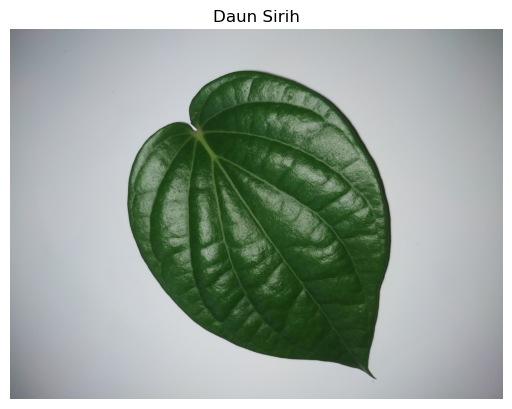

In [3]:
img = view_random_image("dataset tumbuhan/DATASET TANAMAN HERBAL/Data Training/","Daun Sirih")

In [4]:
img

array([[[119, 120, 124],
        [120, 121, 125],
        [120, 121, 125],
        ...,
        [120, 122, 121],
        [118, 120, 119],
        [116, 118, 117]],

       [[120, 121, 125],
        [120, 121, 125],
        [119, 120, 124],
        ...,
        [119, 121, 120],
        [118, 120, 119],
        [117, 119, 118]],

       [[119, 120, 124],
        [118, 119, 123],
        [118, 119, 123],
        ...,
        [120, 122, 121],
        [119, 121, 120],
        [117, 119, 118]],

       ...,

       [[113, 114, 116],
        [114, 115, 119],
        [114, 115, 119],
        ...,
        [128, 128, 130],
        [128, 128, 130],
        [128, 128, 130]],

       [[112, 113, 115],
        [112, 113, 117],
        [113, 114, 118],
        ...,
        [127, 127, 129],
        [127, 127, 129],
        [128, 128, 130]],

       [[110, 111, 113],
        [109, 110, 114],
        [112, 113, 117],
        ...,
        [128, 128, 130],
        [127, 127, 129],
        [127, 127, 129]]

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [6]:
tf.random.set_seed(46)

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_dir = "dataset tumbuhan/DATASET TANAMAN HERBAL/Data Training"
test_dir = "dataset tumbuhan/DATASET TANAMAN HERBAL/Data Testing"

In [9]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 16,
                                               target_size = (450,550),
                                               class_mode = "categorical",
                                               seed = 46
                                              )

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 16,
                                               target_size = (450,550),
                                               class_mode = "categorical",
                                               seed = 46
                                              )

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [10]:
model_1 = Sequential([
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [11]:
model_1.compile(
    loss= "categorical_crossentropy",
    optimizer = Adam(),
    metrics = ['accuracy'] 
)

In [12]:
history_1 = model_1.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/10
50/50 [==============================] - 231s 5s/step - loss: 4.0508 - accuracy: 0.3225 - val_loss: 2.0061 - val_accuracy: 0.4550
Epoch 2/10
50/50 [==============================] - 226s 5s/step - loss: 0.8444 - accuracy: 0.7588 - val_loss: 1.8508 - val_accuracy: 0.4950
Epoch 3/10
50/50 [==============================] - 213s 4s/step - loss: 0.3759 - accuracy: 0.9087 - val_loss: 1.5736 - val_accuracy: 0.5150
Epoch 4/10
50/50 [==============================] - 242s 5s/step - loss: 0.1253 - accuracy: 0.9750 - val_loss: 1.7371 - val_accuracy: 0.5550
Epoch 5/10
50/50 [==============================] - 265s 5s/step - loss: 0.0401 - accuracy: 0.9912 - val_loss: 2.0132 - val_accuracy: 0.5550
Epoch 6/10
50/50 [==============================] - 245s 5s/step - loss: 0.0300 - accuracy: 0.9950 - val_loss: 1.6629 - val_accuracy: 0.6100
Epoch 7/10
50/50 [==============================] - 246s 5s/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.9378 - val_accuracy: 0.6200
Epoch 8/10
50

In [13]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple 
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m' 
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

In [14]:
def plot_loss_curves(history_1):
    loss = history_1.history['loss']
    val_loss = history_1.history['val_loss']
    
    accuracy = history_1.history['accuracy']
    val_accuracy = history_1.history['val_accuracy']
    
    epochs = range(len(history_1.history['loss']))
    
    #plot
    plt.plot(epochs, loss, label = 'training_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.ylabel("value")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label = 'training_accuracy')
    plt.plot(epochs, val_accuracy, label = 'val_accuracy')
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("value")
    plt.legend()

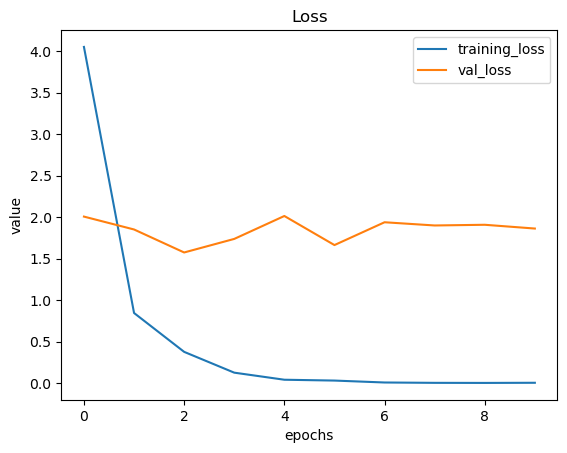

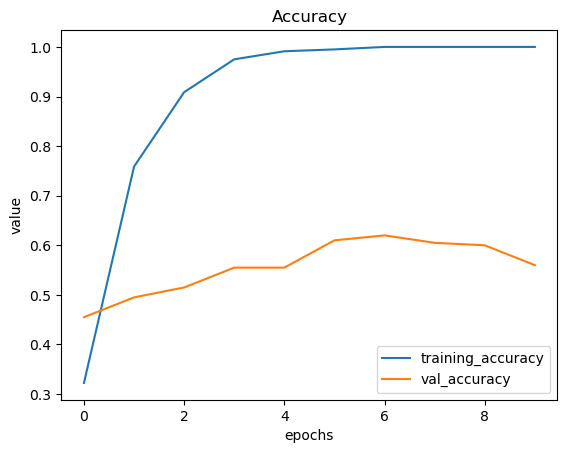

In [15]:
plot_loss_curves(history_1)